### Libraries

In [1]:
# Utils
import pandas as pd
import numpy as np
import json
import os
import subprocess
import zipfile
import IPython.display as ipd
from pathlib import Path
from collections import Counter

# Library for audio processing
import librosa
import librosa.display
import soundfile as sf
from scipy.io.wavfile import write

# Visualizations and plots
import matplotlib.pyplot as plt

# Options
pd.set_option("display.max_columns", None)
pd.options.mode.chained_assignment = None

# Warnings
import warnings
warnings.filterwarnings('ignore', '.*PySoundFile failed. Trying audioread instead*.', )

c:\Users\Dinesh\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# Feature extractor for MFCC only
def mfcc_extractor(input):
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
  return mfcc

### Example

In [3]:
audio_path = 'public_dataset/Example/audiopreprocessed_example.wav'
audio, sr = librosa.load(audio_path)
ipd.Audio(audio, rate = sr)

In [4]:
features = mfcc_extractor(audio)

C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)


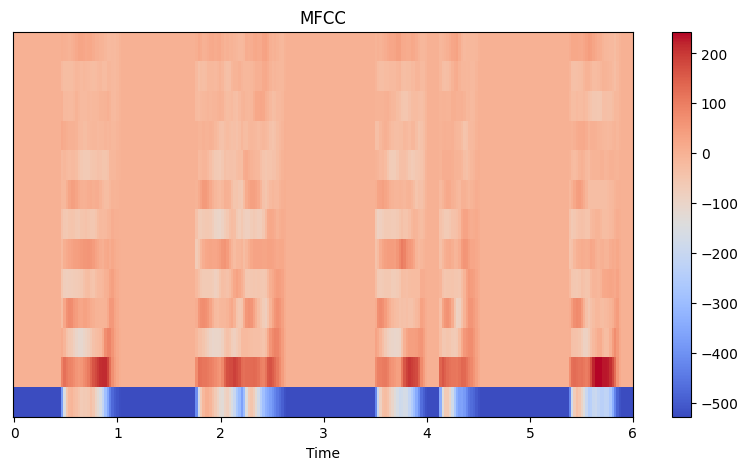

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
mfcc = librosa.display.specshow(features, x_axis='time', ax=ax)
ax.set(title='MFCC')
fig.colorbar(mfcc, ax=ax)
plt.show()

### Feature extraction

#### Full dataset

In [6]:
# Data loader
def feature_extractor_BI2(extractor, tracks, original_path, augmented_path):
    labels = []
    features = []
    counter = 0

    max_frames = 422  # Maximum number of frames for padding

    for index, row in tracks.iterrows():
        if row['uuid'].startswith('aug_'):
            tmp_audio, tmp_sr = librosa.load(augmented_path + row['uuid'])
        else:
            tmp_audio, tmp_sr = librosa.load(original_path + row['uuid'])

        tmp_features = extractor(tmp_audio)

        # Pad or truncate the features to have the same number of frames
        if tmp_features.shape[1] < max_frames:
            pad_width = max_frames - tmp_features.shape[1]
            tmp_features = np.pad(tmp_features, ((0, 0), (0, pad_width)))
        elif tmp_features.shape[1] > max_frames:
            tmp_features = tmp_features[:, :max_frames]

        features.append(tmp_features)

        tmp_class = row['COVID19_BI_2']
        labels.append(tmp_class)

        counter += 1
        if counter % 1000 == 0:
            print('Processed: ' + str(counter) + '/' + str(tracks.shape[0]))

    features = np.asarray(features)  # Convert the list to a NumPy array

    return features, labels

In [7]:
audioBI2 = pd.read_csv('public_dataset/AugBeforeSplit/complete_audiotracks.csv')
audioBI2 = audioBI2.drop(['Unnamed: 0'], axis = 1)

In [8]:
original_path = 'public_dataset/AudioNoNoise/'
aug_path = 'public_dataset/AugAllDataset/'

In [9]:
# MFCC extraction
features_BI2, labels_BI2 = feature_extractor_BI2(mfcc_extractor, audioBI2, original_path, aug_path)

C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_lengt

Processed: 1000/9205


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
  2.4414062e-04 -3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00018311 -0.00021362
  0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00015259 -0.00018311
  0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(in

Processed: 2000/9205


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.7983398e-04
 -6.1035156e-05 -7.6293945e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.34683228 0.28131104 0.18106079] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.2207031e-04 1.2207031e-04
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mf

Processed: 3000/9205


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00018311  0.00036621
 -0.00039673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00973511 -0.00442505
 -0.01062012] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(in

Processed: 4000/9205


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  9.1552734e-05
 -1.5258789e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.5258789e-04
 -3.0517578e-05  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.04678345 0.0345459  0.04785156] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feat

Processed: 5000/9205


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00152588  0.00149536
 -0.00418091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00018311 -0.00033569
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
 -6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(in

Processed: 6000/9205


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  8.2397461e-04
  6.4086914e-04  1.7089844e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00170898 -0.00231934
  0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 9.1552734e-05
 1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.fea

Processed: 7000/9205


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[0.08104167 0.07725433 0.08202682 ... 0.07775714 0.08198568 0.08518132] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[0.3758335  0.3514969  0.3083959  ... 0.453726   0.42502478 0.36923015] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 3.2439051e-04  3.4612650e-04  5.5950519e-04 ...  6.6940360e-05
 -4.0941653e-05  2.0719609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13

Processed: 8000/9205


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[0.00200692 0.00207499 0.00203907 ... 0.00136077 0.00162819 0.00185129] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[-3.2090059e-22  3.2367662e-22 -2.6488601e-22 ... -4.9010870e-22
  5.2679305e-23  2.1035143e-22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[-0.02797733 -0.01551727 -0.00775632 ... -0.02954166 -0.02918804
 -0.03114589] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_

Processed: 9000/9205


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 1.5293398e-10 -5.4640786e-10  2.0339340e-10 ... -1.3470770e-09
  1.2662907e-09 -5.9553479e-10] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[0.02978461 0.03542098 0.03282348 ... 0.03853477 0.03931449 0.03066479] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 5.2170299e-06  1.7581900e-05  2.1728902e-05 ...  1.5022149e-05
  2.4379831e-05 -9.4574925e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feat

In [10]:
feat_path_BI2 = 'public_dataset/AugBeforeSplit/mfcc_features.npy'
labels_path_BI2 = 'public_dataset/AugBeforeSplit/mfcc_labels.npy'

In [11]:
np.save(feat_path_BI2, features_BI2)
np.save(labels_path_BI2, labels_BI2)

#### Split

In [12]:
# Data loader
def feature_extractor_test(extractor, tracks, original_path):
    labels = []
    features = []
    counter = 0

    for index, row in tracks.iterrows():
      tmp_audio, tmp_sr = librosa.load(original_path+row['uuid'])

      tmp_features = extractor(tmp_audio)
      features.append(tmp_features)

      tmp_class = row['COVID19_BI_2']
      labels.append(tmp_class)

      counter += 1
      if counter%1000==0:
        print('Processed: ' + str(counter) + '/' + str(tracks.shape[0]))

    return features, labels

In [13]:
train = pd.read_csv('public_dataset/AugAfterSplit/complete_audiotracks_train.csv')
train = train.drop(['Unnamed: 0'], axis = 1)

In [14]:
test = pd.read_csv('public_dataset/AugAfterSplit/original_test.csv')
test = test.drop(['Unnamed: 0'], axis = 1)

In [15]:
original_path = 'public_dataset/AudioNoNoise/'
aug_path = 'public_dataset/FinalVersion/Split/Train/'

In [16]:
# MFCC extraction
features_train, labels_train = feature_extractor_BI2(mfcc_extractor, train, original_path, aug_path)

C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.14334106 0.36434937 0.11627197] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\Ap

Processed: 1000/7362


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  6.1035156e-05
 -1.8310547e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.1362305e-04
  6.1035156e-05 -4.8828125e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an er

Processed: 2000/7362


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.03894043 0.08947754 0.07440186] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00015259  0.
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -1.1505127e-02
 -1.3336182e-02 -1.7395020e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13,

Processed: 3000/7362


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02145386 -0.01953125
 -0.01049805] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00811768 -0.00827026
 -0.01275635] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  6.1035156e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(in

Processed: 4000/7362


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.8310547e-04
  6.1035156e-05 -4.8828125e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00015259 -0.00036621
  0.00045776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  6.1035156e-05
 -3.0517578e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = libro

Processed: 5000/7362


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01141357 -0.01144409
 -0.01287842] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01248169 -0.00686646
 -0.01843262] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(in

Processed: 6000/7362


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 4.79956088e-06  2.63619700e-06 -6.45001410e-06 ... -1.10659375e-05
 -6.96893267e-06 -5.38340544e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 1.5152867e-05  7.8728708e-06 -2.1940607e-06 ...  3.0722134e-05
  3.0223418e-05  2.1961454e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[-0.00478762  0.00420114 -0.00161739 ... -0.01266826 -0.01133607
 -0.01547472] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc =

Processed: 7000/7362


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 4.3903060e-15  4.7011879e-13  2.2229193e-12 ... -2.6141230e-05
  3.1564323e-05  3.1206822e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[-8.0128018e-07 -3.3682202e-06 -4.0285013e-07 ... -1.3265766e-06
 -2.1681394e-06 -2.2743416e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[-1.1138033e-06 -1.3097469e-06  3.0614672e-06 ...  2.6923055e-07
  6.1459053e-07  2.7939868e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an er

In [17]:
print(Counter(labels_train))

Counter({'Negative': 5118, 'Positive': 2244})


In [18]:
features_train_path = 'public_dataset/AugAfterSplit/mfcc_features_train.npy'
labels_train_path = 'public_dataset/AugAfterSplit/mfcc_labels_train.npy'


np.save(features_train_path, features_train)
np.save(labels_train_path, labels_train)

In [19]:
# MFCC extraction
features_test, labels_test = feature_extractor_test(mfcc_extractor, test, original_path)

C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00027466 -0.00045776
  0.0005188 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = libro

Processed: 1000/1373


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
 -3.0517578e-05  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  6.1035156e-05
 -1.5258789e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(input, n_mfcc=13, n_fft=2048, hop_length=512)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_17072\3203235036.py:3: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an er

In [20]:
print(Counter(labels_test))

Counter({'Negative': 1279, 'Positive': 94})


In [21]:
features_test_path = 'public_dataset/AugAfterSplit/mfcc_features_test.npy'
labels_test_path = 'public_dataset/AugAfterSplit/mfcc_labels_test.npy'

# After extracting the features
max_frames = 422  # Maximum number of frames

# Truncate or pad the features to have a fixed number of frames
for i in range(len(features_test)):
    if features_test[i].shape[1] > max_frames:
        features_test[i] = features_test[i][:, :max_frames]
    elif features_test[i].shape[1] < max_frames:
        pad_width = max_frames - features_test[i].shape[1]
        features_test[i] = np.pad(features_test[i], ((0, 0), (0, pad_width)))

np.save(features_test_path, features_test)
np.save(labels_test_path, labels_test)